# Africa Education

This example uses the 'Africa Education' dataset to predict student performance. You can download the Jupyter Notebook of the study <a href="africa_education.ipynb">here</a>.
<ul class="ul_content">
    <li><b>COUNTRY</b> : COUNTRY ID</li>
    <li><b>REGION</b> : REGION ID</li>
    <li><b>SCHOOL</b> : SCHOOL ID</li>
    <li><b>PUPIL</b> : STUDENT ID</li>
    <li><b>province</b> : School Province</li>
    <li><b>schoolname</b> : School Name</li>
    <li><b>lat</b> : School Latitude</li>
    <li><b>long</b> : School Longitude</li>
    <li><b>country_long</b> : Country Name</li>
    <li><b>zralocp</b> : Student's standardized reading score</li> 
    <li><b>zmalocp</b> : Student's standardized mathematics score</li>
    <li><b>ZRALEVP</b> : Student's reading level</li>
    <li><b>ZMALEVP</b> : Student's mathematics competency level</li>
    <li><b>zraloct</b> : Teacher's standardized reading score</li> 
    <li><b>ZRALEVT</b> : Student's reading competency level Teacher</li>
    <li><b>ZMALEVT</b> : Student's mathematics competency level Teacher</li>
    <li><b>zsdist</b> :	School average distance from clinic, road, public, library, book shop & secondary school</li>
    <li><b>XNUMYRS</b> : Teacher's years of teaching</li>
    <li><b>numstu</b> : Number of students at each school</li>
    <li><b>PSEX</b> : Student's sex</li>
    <li><b>PNURSERY</b> : Student preschool</li>
    <li><b>PENGLISH</b> : Student speaks English at home</li>
    <li><b>PMALIVE</b> : Student's biological mother alive</li>
    <li><b>PFALIVE</b> : Student's biological father alive</li>
    <li><b>PTRAVEL</b> : Travels to school</li>
    <li><b>PTRAVEL2</b> : Means of transportation to school</li>
    <li><b>PMOTHER</b> : Mother's education</li>
    <li><b>PFATHER</b> : Father's education</li>
    <li><b>PLIGHT</b> : Source of lighting</li>
    <li><b>PABSENT</b> : Days absent</li>
    <li><b>PREPEAT</b> : Years repeated</li>
    <li><b>STYPE</b> : School type</li>
    <li><b>SLOCAT</b> :	School location</li>
    <li><b>SQACADEM</b> : Academic qualifications</li>
    <li><b>XSEX</b> : Teacher's sex</li>
    <li><b>XAGE</b> : Teacher's age</li>
    <li><b>XQPERMNT</b> : Teacher's employment status</li>
    <li><b>XQPROFES</b> : Teacher's training</li>
    <li><b>zpsibs</b> : Student's number of siblings</li>
    <li><b>zpsit</b> : Seating location</li>
    <li><b>zpmealsc</b> : Free school meals</li>
    <li><b>zphmwkhl</b> : Homework help</li>
    <li><b>zpses</b> : Student's socioeconomic status</li>
    <li><b>PAGE</b> : Student's Age</li>
    <li><b>SINS2006</b> : School inspection</li>
    <li><b>SPUPPR04</b> : Student dropout</li>
    <li><b>SPUPPR06</b> : Student cheats</li>
    <li><b>SPUPPR07</b> : Student uses abusive language</li>
    <li><b>SPUPPR08</b> : Student vandalism</li>
    <li><b>SPUPPR09</b> : Student theft</li>
    <li><b>SPUPPR10</b> : Student bullies students</li>
    <li><b>SPUPPR11</b> : Student bullies staff</li>
    <li><b>SPUPPR12</b> : Student injures staff</li>
    <li><b>SPUPPR13</b> : Student sexually harrasses students</li>
    <li><b>SPUPPR14</b> : Student sexually harrasses teachers</li>
    <li><b>SPUPPR15</b> : Student drug abuse</li>
    <li><b>SPUPPR16</b> : Student alcohol abuse</li>
    <li><b>SPUPPR17</b> : Student fights</li>
    <li><b>STCHPR04</b> : Teacher bullies students</li>
    <li><b>STCHPR05</b> : Teacher sexually harasses teachers</li>
    <li><b>STCHPR06</b> : Teacher sexually harasses students</li>
    <li><b>STCHPR07</b> : Teacher uses abusive language</li>
    <li><b>STCHPR08</b> : Teacher drug abuse</li>
    <li><b>STCHPR09</b> : Teacher alcohol abuse</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'1.1.0-beta'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="https://www.vertica.com/python/documentation/1.0.x/html/connection.html">connection tutorial</a>.

You can skip the below cell if you already have an established connection.

In [2]:
vp.connect("VerticaDSN")

Connected Successfully!


Let's create a Virtual DataFrame of the dataset. The dataset is available <a href="../../data/africa_education.csv">here</a>.

In [3]:
from verticapy.datasets import load_africa_education
africa = load_africa_education()

## Data Exploration and Preparation

Let's look at the links between all the variables. Remember our goal: find a way to predict students' final scores (zralocp & zmalocp).

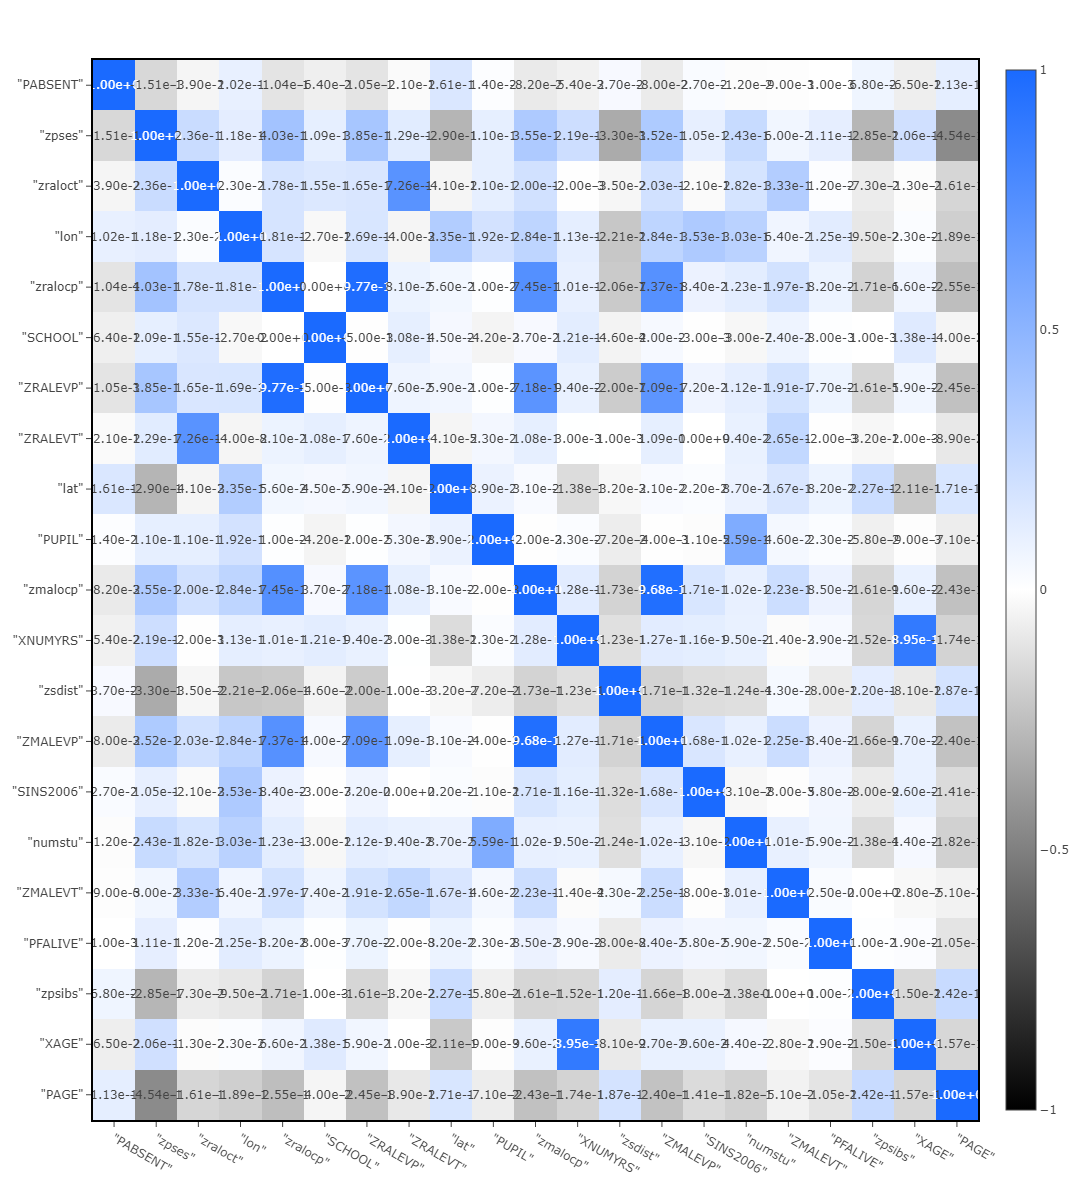

In [4]:
africa.corr()

Some variables are useless because they are categorizations of others. For example, most scores can go from 0 to 1000, and some variables are created by mapping these variables to a reduced interval (for example: 0 to 10), so we can drop them.

None  PABSENT    SPUPPR16    zpmealsc    PREPEAT    zpses   \\
1          0       NEVER          No      NEVER     None   \\
2          0       NEVER          No      NEVER     None   \\
None  SPUPPR06        zraloct    XSEX          lon        zralocp   \\
1       NEVER    648.0909602    MALE    35.740688    411.8406417   \\
2       NEVER    648.0909602    MALE    35.740688    504.0707822   \\
None  district    SPUPPR13     SPUPPR09     SPUPPR10                          zpsit   \\
1    Marromeu       NEVER    SOMETIMES    SOMETIMES    I have my own sitting place   \\
2    Marromeu       NEVER    SOMETIMES    SOMETIMES    I have my own sitting place   \\
None  PNURSERY    STCHPR08    country_long    XQPROFES    PTRAVEL2   \\
1       NEVER       NEVER      Mozambique    2 YRS TT        WALK   \\
2       NEVER       NEVER      Mozambique    2 YRS TT        WALK   \\
None      PTRAVEL           lat    PLIGHT    REGION      SUPPR17   \\
1    UP TO 0.5KM    -12.764099       GAS       SOF    SOMETIMES   \\
2    UP TO 0.5KM    -12.764099       GAS       SOF    SOMETIMES   \\
None  ...    STCHPR06    XNUMYRS       PFATHER    zsdist   \\
1    ...       NEVER       30.0    Completed        7.4   \\
2    ...       NEVER       30.0    Completed        7.4   \\
None  PSEX       SLOCAT    province                       zphmwkhl   \\
1    GIRL    SMALLTOWN      Sofala    No homework/Never/Sometimes   \\
2     BOY    SMALLTOWN      Sofala    No homework/Never/Sometimes   \\
None   SPUPPR04     SPUPPR11     STCHPR07       SQACADEM   \\
1    SOMETIMES    SOMETIMES    SOMETIMES    TERTIARY ED   \\
2    SOMETIMES    SOMETIMES    SOMETIMES    TERTIARY ED   \\
None  STCHPR04    SINS2006    numstu    PFALIVE     STCHPR09   \\
1       NEVER         1.0        16       True    SOMETIMES   \\
2       NEVER         1.0        16      False    SOMETIMES   \\
None  SPUPPR15        PENGLISH    SPUPPR12    zpsibs    XAGE   \\
1       NEVER    ALL THE TIME       NEVER         0    50.0   \\
2       NEVER    ALL THE TIME       NEVER         0    50.0   \\
None  SPUPPR08    PAGE        schoolname  
1       NEVER      14    Escola PrimÃ¡r  
2       NEVER      17    Escola PrimÃ¡r  
Rows: 1-2 | Columns: 56
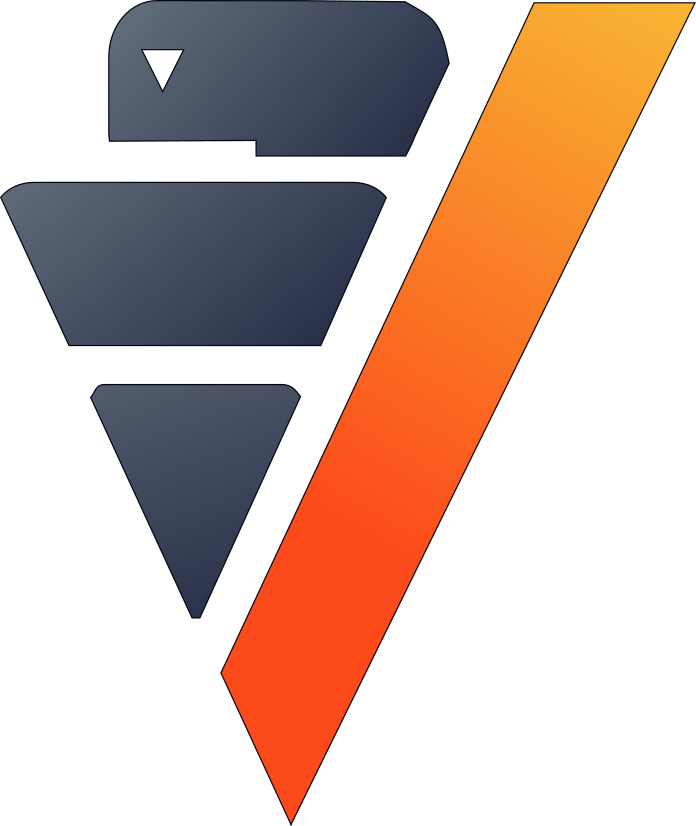

In [5]:
africa.drop(
    ["ZMALEVT", 
     "ZRALEVT", 
     "ZRALEVP", 
     "ZMALEVP",
     "COUNTRY",
     "SCHOOL",
     "PUPIL"]
).head(2)

Let's take a look at the missing values.

  0%|          | 0/3 [00:00<?, ?it/s]

None                  count    percent  
"PABSENT"           19290.0      100.0  
"zpmealsc"          19290.0      100.0  
"PREPEAT"           19290.0      100.0  
"lon"               19290.0      100.0  
"zralocp"           19290.0      100.0  
"district"          19290.0      100.0  
"zpsit"             19290.0      100.0  
"PNURSERY"          19290.0      100.0  
"country_long"      19290.0      100.0  
"PTRAVEL2"          19290.0      100.0  
"PTRAVEL"           19290.0      100.0  
"lat"               19290.0      100.0  
"PLIGHT"            19290.0      100.0  
"REGION"            19290.0      100.0  
"PMOTHER"           19290.0      100.0  
"PMALIVE"           19290.0      100.0  
"PSEX"              19290.0      100.0  
"province"          19290.0      100.0  
"zphmwkhl"          19290.0      100.0  
"numstu"            19290.0      100.0  
"PFALIVE"           19290.0      100.0  
"PENGLISH"          19290.0      100.0  
"zpsibs"            19290.0      100.0  
"PAGE"              19290.0      100.0  
"schoolname"        19290.0      100.0  
"STYPE"             19281.0     99.953  
"SLOCAT"            19281.0     99.953  
"zpses"             19271.0     99.902  
"zmalocp"           19263.0      99.86  
"XQPROFES"          19233.0     99.705  
"XNUMYRS"           19233.0     99.705  
"XAGE"              19233.0     99.705  
"PFATHER"           19188.0     99.471  
"SPUPPR16"          19106.0     99.046  
"SPUPPR06"          19106.0     99.046  
"SPUPPR13"          19106.0     99.046  
"SPUPPR09"          19106.0     99.046  
"SPUPPR10"          19106.0     99.046  
"STCHPR08"          19106.0     99.046  
"SUPPR17"           19106.0     99.046  
"SPUPPR07"          19106.0     99.046  
"SPUPPR14"          19106.0     99.046  
"STCHPR06"          19106.0     99.046  
"SPUPPR04"          19106.0     99.046  
"SPUPPR11"          19106.0     99.046  
"STCHPR07"          19106.0     99.046  
"SQACADEM"          19106.0     99.046  
"STCHPR04"          19106.0     99.046  
"STCHPR09"          19106.0     99.046  
"SPUPPR15"          19106.0     99.046  
"SPUPPR12"          19106.0     99.046  
"SPUPPR08"          19106.0     99.046  
"XSEX"              19069.0     98.854  
"SINS2006"          18801.0     97.465  
"zsdist"            18562.0     96.226  
"zraloct"           17214.0     89.238  
Rows: 1-56 | Columns: 3
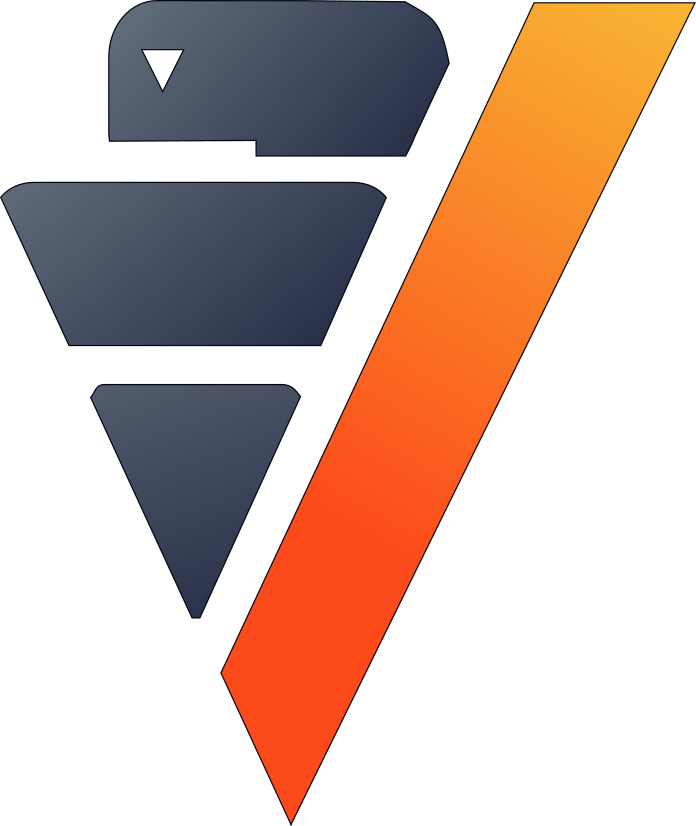

In [6]:
africa.count_percent()

Many values are missing for 'zraloct' which is the teachers' test score. We need to find a way to impute them as they represent more than 10% of the dataset. For the others that represent less than 5% of the dataset, our goal is to identify what improves student performance, so we can filter them.

We'll use two variables to impute the teachers' scores: TEACHER'S SEX (XSEX) and Teacher's Training (XQPROFES).

2019 elements were filled.
Nothing was filtered.


None   PABSENT     SPUPPR16       zpmealsc       PREPEAT   \\
1           25        NEVER    One per day         NEVER   \\
2           12    SOMETIMES             No          ONCE   \\
3           12        NEVER    One per day          ONCE   \\
4           11        NEVER    One per day          ONCE   \\
5           10    SOMETIMES             No         NEVER   \\
6            9        NEVER    One per day         TWICE   \\
7            9        NEVER    One per day          ONCE   \\
8            9        NEVER             No         NEVER   \\
9            8        OFTEN             No         NEVER   \\
10           7    SOMETIMES             No          ONCE   \\
11           7        OFTEN             No          ONCE   \\
12           6    SOMETIMES             No         TWICE   \\
13           6        NEVER    One per day          ONCE   \\
14           5    SOMETIMES    One per day         NEVER   \\
15           5    SOMETIMES             No         NEVER   \\
16           5        OFTEN             No         NEVER   \\
17           5        OFTEN             No         NEVER   \\
18           5        NEVER    One per day         TWICE   \\
19           5        NEVER    One per day         TWICE   \\
20           5        NEVER    One per day          ONCE   \\
21           5        NEVER    One per day          ONCE   \\
22           5        NEVER    One per day          ONCE   \\
23           5        NEVER    One per day         NEVER   \\
24           5        NEVER    One per day         NEVER   \\
25           5        NEVER             No         TWICE   \\
26           5        NEVER             No         TWICE   \\
27           5        NEVER             No         NEVER   \\
28           4    SOMETIMES    One per day          ONCE   \\
29           4    SOMETIMES    One per day         NEVER   \\
30           4    SOMETIMES             No          ONCE   \\
31           4        OFTEN             No         NEVER   \\
32           4        OFTEN             No         NEVER   \\
33           4        OFTEN             No         NEVER   \\
34           4        NEVER    One per day         TWICE   \\
35           4        NEVER    One per day          ONCE   \\
36           4        NEVER    One per day          ONCE   \\
37           4        NEVER    One per day          ONCE   \\
38           4        NEVER    One per day         NEVER   \\
39           4        NEVER             No         TWICE   \\
40           4        NEVER             No          ONCE   \\
41           4        NEVER             No         NEVER   \\
42           3        NEVER    One per day         TWICE   \\
43           3        NEVER    One per day          ONCE   \\
44           3        NEVER    One per day          ONCE   \\
45           3        NEVER    One per day          ONCE   \\
46           3        NEVER    One per day          ONCE   \\
47           3        NEVER    One per day          ONCE   \\
48           3        NEVER    One per day          ONCE   \\
49           3        NEVER    One per day         NEVER   \\
50           3        NEVER    One per day         NEVER   \\
51           3        NEVER    One per day         NEVER   \\
52           3        NEVER             No    THREE PLUS   \\
53           3        NEVER             No          ONCE   \\
54           2    SOMETIMES    One per day         TWICE   \\
55           2    SOMETIMES    One per day    THREE PLUS   \\
56           2    SOMETIMES             No          ONCE   \\
57           2    SOMETIMES             No          ONCE   \\
58           2    SOMETIMES             No          ONCE   \\
59           2    SOMETIMES             No         NEVER   \\
60           2    SOMETIMES             No         NEVER   \\
61           2    SOMETIMES             No         NEVER   \\
62           2        OFTEN             No          ONCE   \\
63           2        OFTEN             No         NEVER   \\
64           2        OFTEN     
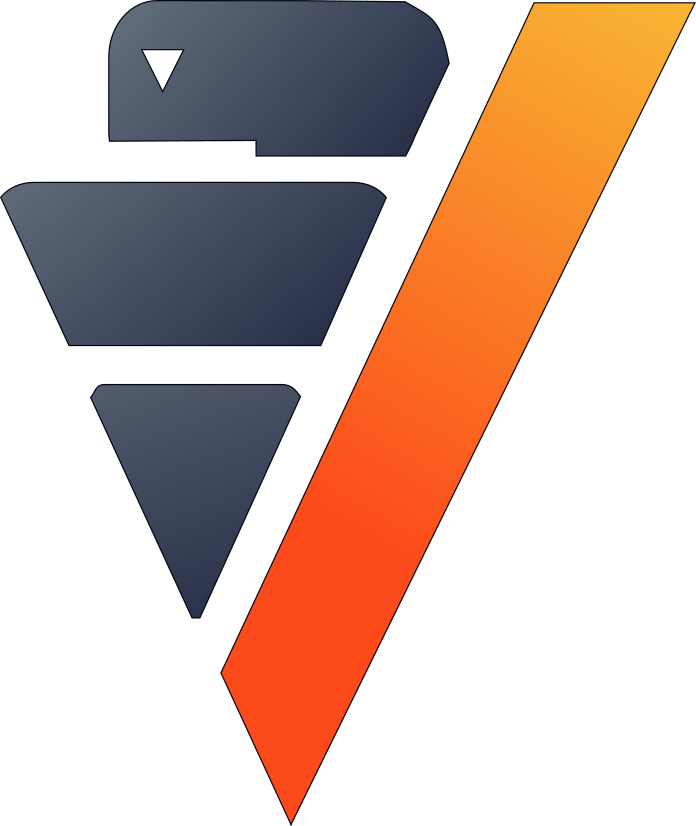

In [7]:
africa["zraloct"].fillna(
    method = "avg", 
    by = ["XSEX", "XQPROFES"]
)
africa.dropna()

Now that we have a clean dataset, we can use a Random Forest Regressor to understand what tends to influence the a student's final score.

## Machine Learning: Finding Clusters using lat/long

Let's try to find some clusters between schools.

Since we have the school's location, a natural approach might be to find school clusters based on proximity. These clusters can be used as inputs by our model.

  0%|          | 0/29 [00:00<?, ?it/s]

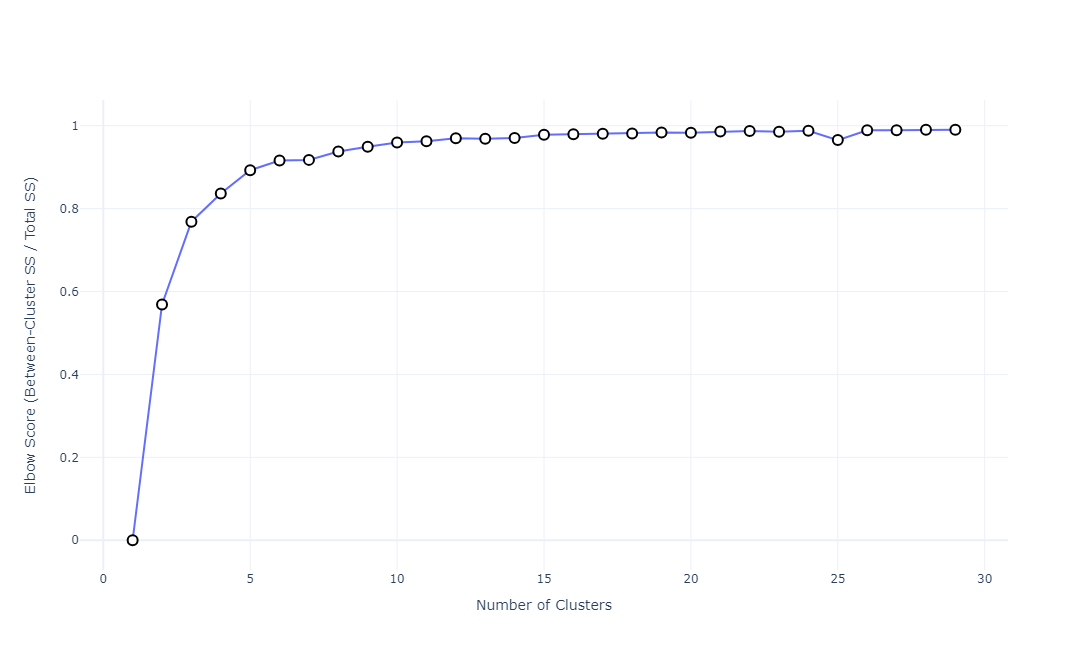

In [8]:
from verticapy.machine_learning.model_selection import elbow

elbow(africa,
      X = ["lon", "lat"],
      n_cluster = (1, 30),
     show = True)

Eight seems to be a suitable number of clusters. Let's compute a k-means model.

In [9]:
from verticapy.machine_learning.vertica.cluster import KMeans
model = KMeans(n_cluster = 8)
model.fit(africa, X = ["lon", "lat"])



centers
  lon   |   lat   
--------+---------
29.97380|-28.01209
35.67949|-1.87722 
57.17161|-15.28719
16.78940|-19.62369
27.00800|-24.57390
19.77070|-31.08098
35.20681|-13.00139
28.98487|-17.86685


metrics
Evaluation metrics:
     Total Sum of Squares: 3786806.5
     Within-Cluster Sum of Squares: 
         Cluster 0: 34324.954
         Cluster 1: 86498.862
         Cluster 2: 91475.146
         Cluster 3: 13338.917
         Cluster 4: 13988.479
         Cluster 5: 8466.9589
         Cluster 6: 21929.941
         Cluster 7: 24117.938
     Total Within-Cluster Sum of Squares: 294141.2
     Between-Cluster Sum of Squares: 3492665.3
     Between-Cluster SS / Total SS: 92.23%
 Number of iterations performed: 30
 Converged: True
 Call:
kmeans('"public"."_verticapy_tmp_kmeans_v_demo_a470f422873311ef84370242ac120002_"', '"public"."_verticapy_tmp_view_v_demo_a49d153e873311ef84370242ac120002_"', '"lon", "lat"', 8
USING PARAMETERS max_iterations=300, epsilon=0.0001, init_method='kmeanspp', d

We can add the prediction to the vDataFrame and draw the scatter map.

<Axes: xlabel='lon', ylabel='lat'>

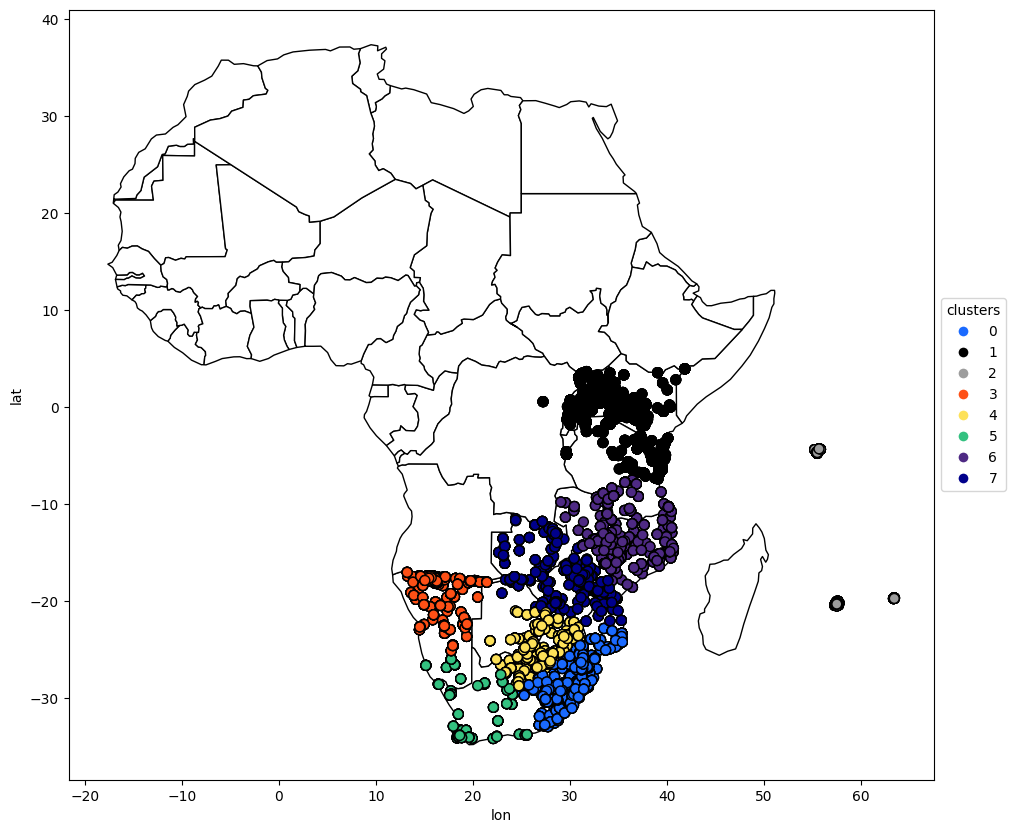

In [10]:
# Change the plotting lib to matplotlib
vp.set_option("plotting_lib", "matplotlib")

# Adding the prediction to the vDataFrame
model.predict(africa, name = "clusters")

# Importing the World Data
from verticapy.datasets import load_world
africa_world = load_world()
# Filtering and drawing Africa
africa_world = africa_world[africa_world["continent"] == "Africa"]
ax = africa_world["geometry"].geo_plot(color = "white", edgecolor='black',)
# displaying the clusters
africa.scatter(
    ["lon", "lat"],
    by = "clusters",
    ax = ax,
)


## Machine Learning: Understanding the Students' Final Scores

A student's math score is strongly correlated their reading score, so we can use just one of the variables for our predictions. Let's use a cross validation to see if our variables have enough information to predict the students' scores.

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/vertica_python/vertica/connection.py:693: UserWarning:

WARNING 8414: max_depth is set to 20 while max_breadth to 1000000000. This means the size of trees may become limited by max_depth first



None          explained_variance             max_error    median_absolute_error   \\
1-fold          0.46809920592239      334.032066723381         47.8619104010304   \\
2-fold         0.461429314057627      360.282706132012         47.0833649984065   \\
3-fold         0.479404492168436      389.732664661637         46.2183134342545   \\
avg          0.46964433738281763    361.34914583900996       47.054529611230464   \\
std         0.007419224148625843     22.75217385813656       0.6713053736136935   \\
None        mean_absolute_error    mean_squared_error    root_mean_squared_error   \\
1-fold         58.2373911183274      5523.00682567919           74.3169349857702   \\
2-fold         58.2126101811019      5535.70914150529           74.4023463440857   \\
3-fold         57.5393674602096      5404.61613251451           73.5160943774525   \\
avg           57.99645625321296      5487.77736656633           74.0784585691028   \\
std          0.3233688783514389     59.03208361336325        0.39917739420813464   \\
None                          r2                  r2_adj                   aic   \\
1-fold         0.467776713460035       0.463154095972132      52152.6280972466   \\
2-fold         0.460924584602458       0.456229906725943      52028.6049701463   \\
3-fold         0.479349161298892        0.47481569786747      51892.8269724267   \\
avg          0.46935015312046163     0.46473323352184837     52024.68667993986   \\
std         0.007603641271761281    0.007669340025487168    106.09954716531455   \\
None                       bic                  time  
1-fold        52506.1597852389    158.66356325149536  
2-fold        52381.9909964329    170.19512104988098  
3-fold        52246.2221143005     165.4243016242981  
avg         52378.124298657436    164.76099530855814  
std         106.15432698665734     4.731045533899981  
Rows: 1-5 | Columns: 12
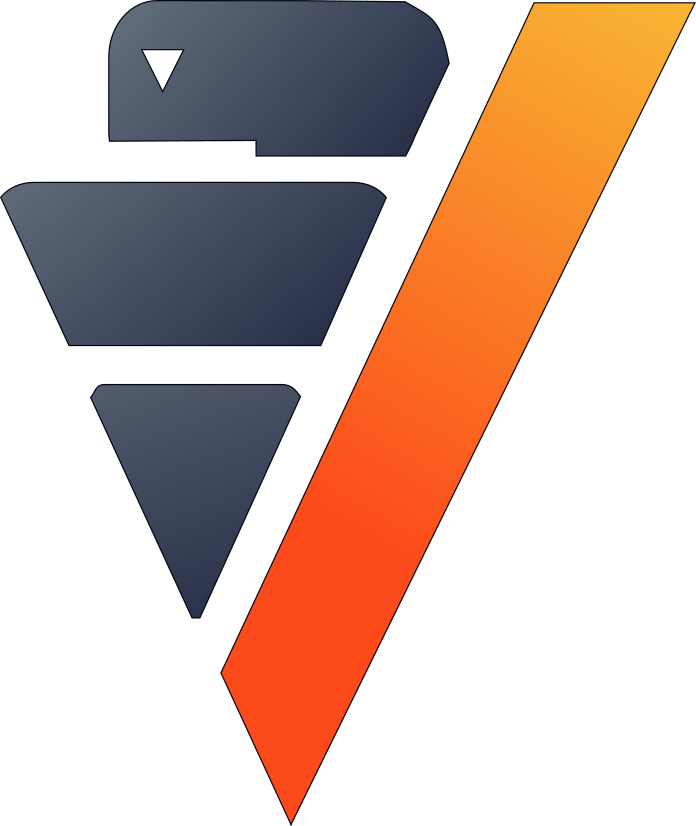

In [11]:
from verticapy.machine_learning.vertica.ensemble import RandomForestRegressor
from verticapy.machine_learning.model_selection import cross_validate

predictors = africa.get_columns(
    exclude_columns = ["zralocp", 
                       "zmalocp",
                       "lat", 
                       "lon",
                       "schoolname"
                      ]
)
response = "zralocp"
model = RandomForestRegressor(
    n_estimators = 40,
    max_depth = 20,
    min_samples_leaf = 4,
    nbins = 20,
    sample = 0.7
)
cross_validate(
    model, 
    africa,
    X = predictors, 
    y = response
)

These scores are quite good! Let's fit all the data and keep the most important variables.

In [12]:
model.fit(
    africa, 
    X = predictors, 
    y = response
)
predictors = model.features_importance(show=False)["index"]



call_string
SELECT rf_regressor('"public"."_verticapy_tmp_randomforestregressor_v_demo_ba1deb54873311ef84370242ac120002_"', '"public"."_verticapy_tmp_view_v_demo_01ef6a1a873511ef84370242ac120002_"', 'zralocp', '"PABSENT", "SPUPPR16", "zpmealsc", "PREPEAT", "zpses", "SPUPPR06", "zraloct", "XSEX", "district", "SPUPPR13", "SPUPPR09", "SPUPPR10", "zpsit", "PNURSERY", "STCHPR08", "country_long", "XQPROFES", "PTRAVEL2", "PTRAVEL", "PLIGHT", "REGION", "SUPPR17", "PMOTHER", "STYPE", "SPUPPR07", "SPUPPR14", "PMALIVE", "STCHPR06", "XNUMYRS", "PFATHER", "zsdist", "PSEX", "SLOCAT", "province", "zphmwkhl", "SPUPPR04", "SPUPPR11", "STCHPR07", "SQACADEM", "STCHPR04", "SINS2006", "numstu", "PFALIVE", "STCHPR09", "SPUPPR15", "PENGLISH", "SPUPPR12", "zpsibs", "XAGE", "SPUPPR08", "PAGE", "clusters"' USING PARAMETERS exclude_columns='', ntree=40, mtry=18, sampling_size=0.7, max_depth=20, max_breadth=1000000000, min_leaf_size=4, min_info_gain=0, nbins=20);

details
 predictor  |      type      
---------

We can see here that socioeconomic status and a student's country tend to strongly influence the students work quality. This makes sense: you would expect that having poor studying conditions (unstable government, difficulties at home, etc.) would lead to worse results. For now, let's just consider the 20 most important variables.

Let's do some tuning to find the best parameters for the use case. Our goal will be to optimize the 'median_absolute_error'.

In [13]:
predictors

['zpses',
 'country_long',
 'plight',
 'prepeat',
 'penglish',
 'page',
 'slocat',
 'clusters',
 'spuppr04',
 'ptravel2',
 'district',
 'province',
 'zsdist',
 'region',
 'pnursery',
 'zraloct',
 'zpmealsc',
 'xage',
 'pabsent',
 'zpsibs',
 'sqacadem',
 'xnumyrs',
 'xqprofes',
 'numstu',
 'ptravel',
 'pmother',
 'pfather',
 'sins2006',
 'psex',
 'spuppr08',
 'spuppr10',
 'stype',
 'spuppr09',
 'suppr17',
 'spuppr07',
 'spuppr06',
 'spuppr13',
 'spuppr11',
 'stchpr09',
 'spuppr16',
 'zphmwkhl',
 'stchpr07',
 'stchpr08',
 'stchpr04',
 'spuppr15',
 'xsex',
 'spuppr12',
 'spuppr14',
 'pfalive',
 'zpsit',
 'pmalive',
 'stchpr06']

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/vertica_python/vertica/connection.py:693: UserWarning:

WARNING 8414: max_depth is set to 5 while max_breadth to 100. This means the size of trees may become limited by max_depth first



Model: RandomForestRegressor; Parameters: {'min_samples_leaf': 1, 'max_leaf_nodes': 100, 'max_depth': 5}; Test_score: 53.8856096094725; Train_score: 53.87144893614313; Time: 31.518566608428955;


/usr/local/lib/python3.10/site-packages/vertica_python/vertica/connection.py:693: UserWarning:

WARNING 8414: max_depth is set to 10 while max_breadth to 100. This means the size of trees may become limited by max_breadth first



Model: RandomForestRegressor; Parameters: {'min_samples_leaf': 1, 'max_leaf_nodes': 100, 'max_depth': 10}; Test_score: 49.955910089768565; Train_score: 48.1040728603438; Time: 92.26759958267212;
Model: RandomForestRegressor; Parameters: {'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_depth': 5}; Test_score: 54.75877083263836; Train_score: 53.640412537106236; Time: 38.31627837816874;
Model: RandomForestRegressor; Parameters: {'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_depth': 10}; Test_score: 49.2412772759316; Train_score: 47.442446272456095; Time: 87.28355407714844;
Grid Search Selected Model
RandomForestRegressor; Parameters: {'n_estimators': 40, 'max_features': 'auto', 'max_leaf_nodes': 100, 'sample': 0.7, 'max_depth': 10, 'min_samples_leaf': 3, 'min_info_gain': 0.0, 'nbins': 20}; Test_score: 49.2412772759316; Train_score: 47.442446272456095; Time: 87.28355407714844;


None                              parameters             avg_score   \\
1  {'n_estimators': 40, 'max_features': ...      49.2412772759316   \\
2  {'n_estimators': 40, 'max_features': ...    49.955910089768565   \\
3  {'n_estimators': 40, 'max_features': ...      53.8856096094725   \\
4  {'n_estimators': 40, 'max_features': ...     54.75877083263836   \\
None     avg_train_score              avg_time              score_std   \\
1    47.442446272456095     87.28355407714844    0.42562240305510257   \\
2      48.1040728603438     92.26759958267212    0.42803380690985465   \\
3     53.87144893614313    31.518566608428955      0.744231619560802   \\
4    53.640412537106236     38.31627837816874    0.42055768736869537   \\
None       score_train_std  
1    0.047123350567047945  
2       0.418223192158195  
3     0.17804359928831462  
4     0.06844517488757837  
Rows: 1-4 | Columns: 6
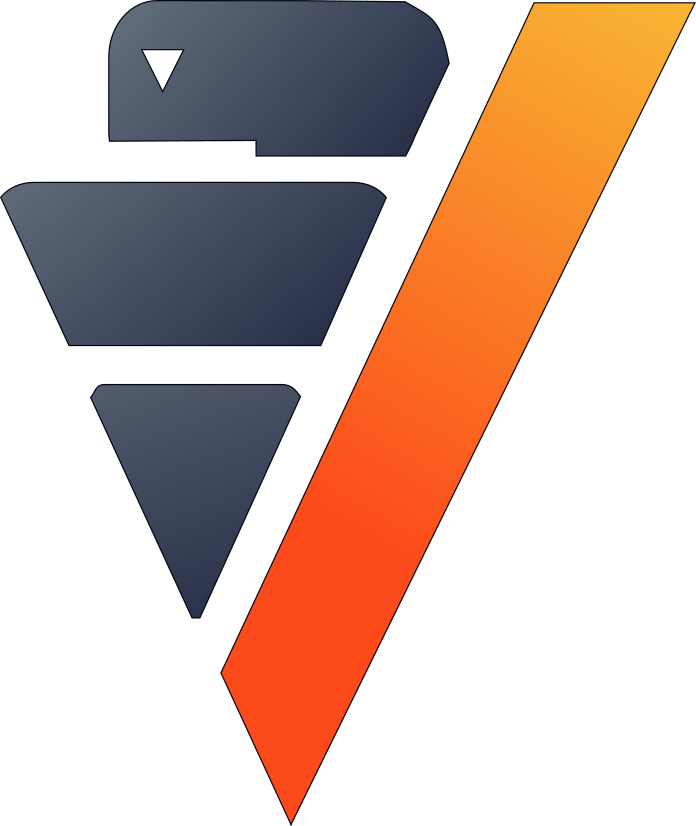

In [14]:
from verticapy.machine_learning.model_selection import grid_search_cv

gcv = grid_search_cv(
    model,
    {
        "min_samples_leaf": [1, 3],
        "max_leaf_nodes": [100],
        "max_depth": [5, 10]
    },
    metric = "median",
    input_relation = africa,
    X = predictors[:20], 
    y = response
)
display(gcv)

Our model is excellent. Let's create one for the students' standardized reading score (zralocp).



call_string
SELECT rf_regressor('"public"."_verticapy_tmp_randomforestregressor_v_demo_b4184e58873711ef84370242ac120002_"', '"public"."_verticapy_tmp_view_v_demo_b4388df8873711ef84370242ac120002_"', 'zralocp', '"zpses", "country_long", "plight", "prepeat", "penglish", "page", "slocat", "clusters", "spuppr04", "ptravel2", "district", "province", "zsdist", "region", "pnursery", "zraloct", "zpmealsc", "xage", "pabsent", "zpsibs"' USING PARAMETERS exclude_columns='', ntree=40, mtry=7, sampling_size=0.7, max_depth=10, max_breadth=100, min_leaf_size=3, min_info_gain=0, nbins=20);

details
 predictor  |      type      
------------+----------------
   zpses    |float or numeric
country_long|char or varchar 
   plight   |char or varchar 
  prepeat   |char or varchar 
  penglish  |char or varchar 
    page    |      int       
   slocat   |char or varchar 
  clusters  |      int       
  spuppr04  |char or varchar 
  ptravel2  |char or varchar 
  district  |char or varchar 
  province  |char 

None                                     value  
explained_variance           0.477029395924332  
max_error                     393.187097592257  
median_absolute_error         47.6559362393814  
mean_absolute_error           57.8296183858314  
mean_squared_error            5409.27000191964  
root_mean_squared_error       73.5477396112188  
r2                           0.477029264276468  
r2_adj                       0.476450692824179  
aic                           155618.740679454  
bic                           155782.516624805  
Rows: 1-10 | Columns: 2
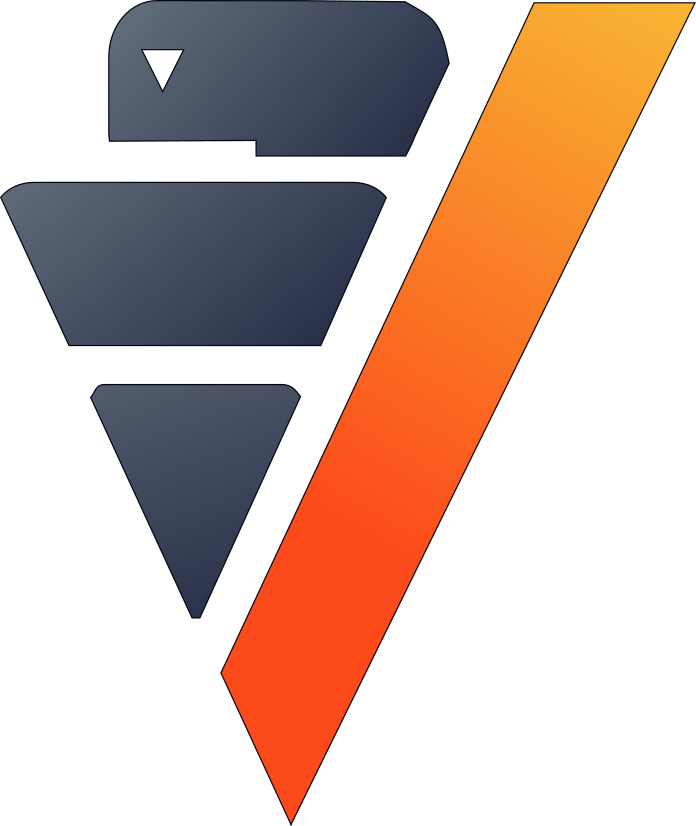

In [15]:
response = "zralocp"
model_africa_rf_zralocp = RandomForestRegressor(**gcv["parameters"][0])
model_africa_rf_zralocp.fit(
    africa,
    predictors[0:20], 
    response
)
model_africa_rf_zralocp.regression_report()

We'll also create one for the students' standardized mathematics score (zmalocp).



call_string
SELECT rf_regressor('"public"."_verticapy_tmp_randomforestregressor_v_demo_f1763cec873711ef84370242ac120002_"', '"public"."_verticapy_tmp_view_v_demo_f1b65d68873711ef84370242ac120002_"', 'zmalocp', '"zpses", "country_long", "plight", "prepeat", "penglish", "page", "slocat", "clusters", "spuppr04", "ptravel2", "district", "province", "zsdist", "region", "pnursery", "zraloct", "zpmealsc", "xage", "pabsent", "zpsibs"' USING PARAMETERS exclude_columns='', ntree=40, mtry=7, sampling_size=0.7, max_depth=10, max_breadth=100, min_leaf_size=3, min_info_gain=0, nbins=20);

details
 predictor  |      type      
------------+----------------
   zpses    |float or numeric
country_long|char or varchar 
   plight   |char or varchar 
  prepeat   |char or varchar 
  penglish  |char or varchar 
    page    |      int       
   slocat   |char or varchar 
  clusters  |      int       
  spuppr04  |char or varchar 
  ptravel2  |char or varchar 
  district  |char or varchar 
  province  |char 

None                                     value  
explained_variance           0.442447060234083  
max_error                     518.503702379208  
median_absolute_error         44.8705439039346  
mean_absolute_error           55.4522385639257  
mean_squared_error            5181.67757163684  
root_mean_squared_error       71.9838702185208  
r2                           0.442447056416027  
r2_adj                       0.441830226076848  
aic                           154840.749925991  
bic                           155004.525871342  
Rows: 1-10 | Columns: 2
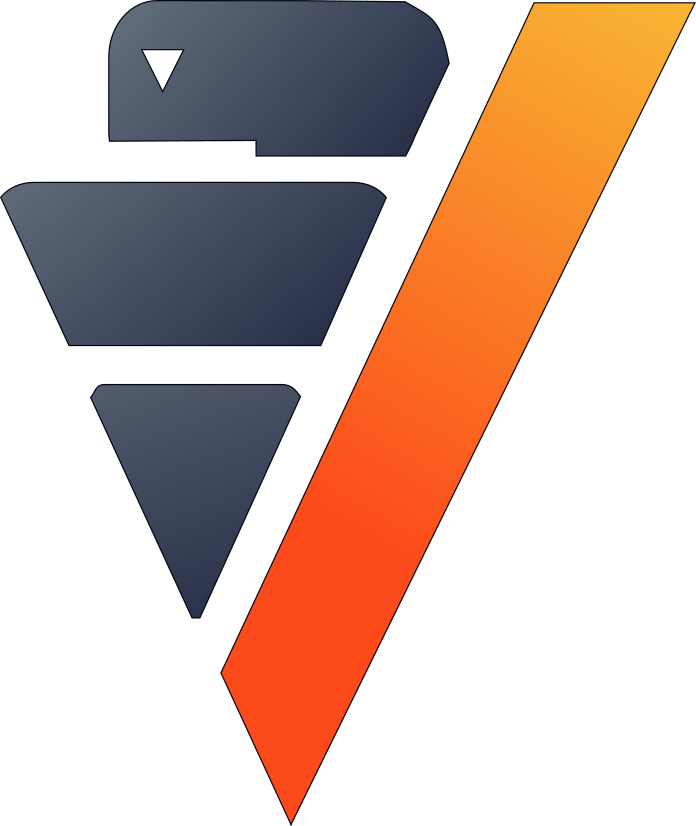

In [16]:
response = "zmalocp"
model_africa_rf_zmalocp = RandomForestRegressor(**gcv["parameters"][0])
model_africa_rf_zmalocp.drop()
model_africa_rf_zmalocp.fit(africa,
                            predictors[0:20], 
                            response)
model_africa_rf_zmalocp.regression_report()

Let's look at the feature importance for each model.

In [17]:
vp.set_option("plotting_lib", "plotly")
model_africa_rf_zralocp.features_importance()

In [18]:
model_africa_rf_zmalocp.features_importance()

Feature importance between between math score and the reading score are almost identical.

We can add these predictions to the main vDataFrame.

None   zpses    country_long          PLIGHT       PREPEAT   \\
1        8.0        Zimbabwe        ELECTRIC    THREE PLUS   \\
2       10.0          Zambia        ELECTRIC          ONCE   \\
3        4.0           Kenya          CANDLE         TWICE   \\
4        3.0         Lesotho          CANDLE         NEVER   \\
5        6.0         Lesotho          CANDLE         NEVER   \\
6        4.0          Uganda    PARAFFIN/OIL         NEVER   \\
7        6.0           Kenya    PARAFFIN/OIL    THREE PLUS   \\
8        6.0        Zanzibar    PARAFFIN/OIL          ONCE   \\
9        8.0        Zimbabwe          CANDLE         TWICE   \\
10       4.0          Malawi    PARAFFIN/OIL          ONCE   \\
11       4.0          Malawi    PARAFFIN/OIL          ONCE   \\
12       2.0          Malawi          CANDLE         NEVER   \\
13       5.0           Kenya            FIRE          ONCE   \\
14       5.0        Zanzibar    PARAFFIN/OIL         NEVER   \\
15       6.0      Mozambique        ELECTRIC          ONCE   \\
16       5.0          Uganda    PARAFFIN/OIL          ONCE   \\
17       5.0          Uganda             GAS          ONCE   \\
18       1.0          Malawi    PARAFFIN/OIL         TWICE   \\
19       4.0        Zanzibar    PARAFFIN/OIL         NEVER   \\
20       3.0         Lesotho    PARAFFIN/OIL          ONCE   \\
21       5.0         Lesotho          CANDLE         NEVER   \\
22       6.0           Kenya    PARAFFIN/OIL         TWICE   \\
23       2.0          Malawi    PARAFFIN/OIL          ONCE   \\
24       6.0           Kenya    PARAFFIN/OIL         NEVER   \\
25       5.0           Kenya    PARAFFIN/OIL         NEVER   \\
26      11.0        Zimbabwe          CANDLE         NEVER   \\
27       6.0        Zimbabwe            FIRE         NEVER   \\
28       8.0          Uganda        ELECTRIC         NEVER   \\
29       6.0         Lesotho          CANDLE         TWICE   \\
30       6.0          Malawi          CANDLE         TWICE   \\
31       3.0         Lesotho    PARAFFIN/OIL    THREE PLUS   \\
32       6.0    South Africa          CANDLE         NEVER   \\
33       4.0      Mozambique    PARAFFIN/OIL         NEVER   \\
34       6.0      Mozambique    PARAFFIN/OIL         TWICE   \\
35       7.0        Zimbabwe        ELECTRIC    THREE PLUS   \\
36       6.0          Uganda          CANDLE          ONCE   \\
37       3.0          Uganda    PARAFFIN/OIL          ONCE   \\
38       2.0          Malawi            FIRE          ONCE   \\
39       1.0      Mozambique    PARAFFIN/OIL          ONCE   \\
40       3.0          Malawi    PARAFFIN/OIL         NEVER   \\
41       3.0          Uganda          CANDLE         NEVER   \\
42      11.0           Kenya        ELECTRIC          ONCE   \\
43       4.0          Malawi    PARAFFIN/OIL          ONCE   \\
44      13.0      Seychelles        ELECTRIC         NEVER   \\
45      11.0      Seychelles        ELECTRIC         NEVER   \\
46       9.0          Malawi        ELECTRIC         NEVER   \\
47       6.0           Kenya          CANDLE         NEVER   \\
48       5.0      Mozambique    PARAFFIN/OIL         NEVER   \\
49       4.0      Mozambique    PARAFFIN/OIL         NEVER   \\
50       3.0        Zanzibar    PARAFFIN/OIL         NEVER   \\
51       3.0          Zambia    PARAFFIN/OIL         NEVER   \\
52       5.0        Zimbabwe             GAS          ONCE   \\
53       3.0         Lesotho            FIRE    THREE PLUS   \\
54       2.0         Lesotho          CANDLE          ONCE   \\
55       2.0          Malawi    PARAFFIN/OIL          ONCE   \\
56       6.0         Lesotho          CANDLE         NEVER   \\
57       3.0           Kenya             GAS         NEVER   \\
58       3.0           Kenya            FIRE         NEVER   \\
59       1.0      Mozambique          CANDLE         NEVER   \\
60       1.0      Mozambique     NO LIGHTING         TWICE   \\
61       1.0          Uganda            FIRE         TWICE   \\
62       7.0          Zambia    
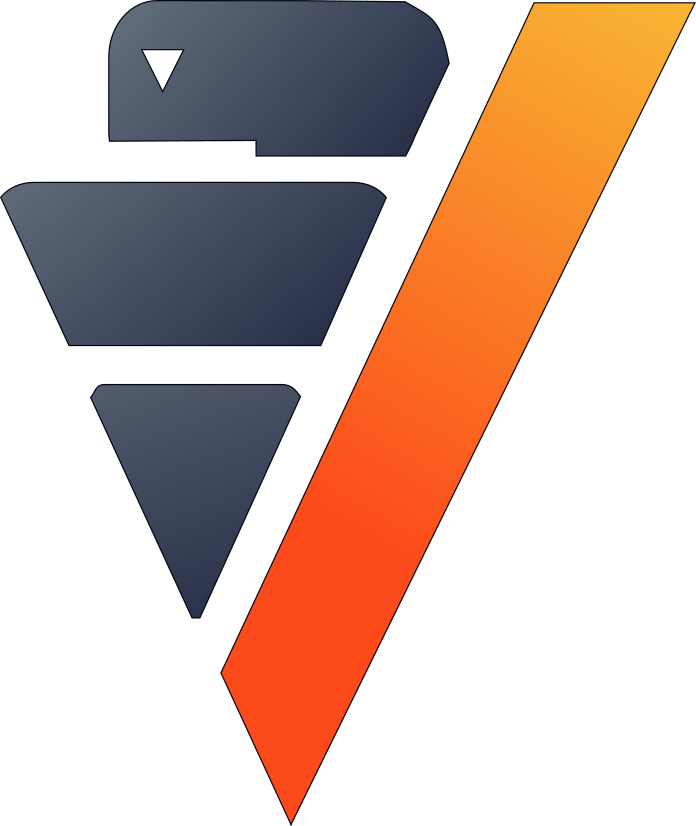

In [19]:
africa = africa.select(predictors[0:23] + ["zralocp", "zmalocp"])
model_africa_rf_zralocp.predict(africa, name = "pred_zralocp")
model_africa_rf_zmalocp.predict(africa, name = "pred_zmalocp")

Let's visualize our model. We begin by creating a bubble plot using the two scores. 

In [20]:
vp.set_option("plotting_lib", "plotly")
africa.scatter(
    columns = ["zralocp", "zmalocp"],
    size = "zpses",
    by = "PENGLISH",
    max_nb_points = 2000
)

/usr/local/lib/python3.10/site-packages/plotly/express/_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Notable influences are home language and the socioeconomic status. It seems like students that both speak Engish at home often (but not all the time) and have a comfortable standard of living tend to perform the best.

Now, let's see how a student's nationality might affect their performance.

In [21]:
africa["country_long"].bar(
    method = "90%", 
    of = "pred_zmalocp",
    max_cardinality = 50,
    width = 800
)

In [22]:
africa["country_long"].bar(
    method = "10%", 
    of = "pred_zmalocp",
    max_cardinality = 50,
    width = 800
)

The students' nationalities seem to have big impact. For example, Swaziland, Kenya, and Tanzanie are probably overrating the bad students (90% of the scores are greater than the average (500)) whereas some countries like Zambia, South Africa, and Malawi are underrating their students (90% of the scores are under 480). This could be related to the global education in the country: some education systems could be harder than the others. Let's break this down by region.

In [23]:
africa.get_columns()

['"zpses"',
 '"country_long"',
 '"PLIGHT"',
 '"PREPEAT"',
 '"PENGLISH"',
 '"PAGE"',
 '"SLOCAT"',
 '"clusters"',
 '"SPUPPR04"',
 '"PTRAVEL2"',
 '"district"',
 '"province"',
 '"zsdist"',
 '"REGION"',
 '"PNURSERY"',
 '"zraloct"',
 '"zpmealsc"',
 '"XAGE"',
 '"PABSENT"',
 '"zpsibs"',
 '"SQACADEM"',
 '"XNUMYRS"',
 '"XQPROFES"',
 '"zralocp"',
 '"zmalocp"',
 '"pred_zralocp"',
 '"pred_zmalocp"']

In [24]:
africa["district"].bar(
    method = "50%", 
    of = "pred_zmalocp",
    max_cardinality = 50,
    width = 1000
)

The same applies to the regions. Let's look at student age.

In [25]:
africa["PAGE"].bar(
    method = "50%", 
    of = "pred_zmalocp",
    max_cardinality = 50,
    width = 1000
)

Let's look at the the variables 'PLIGHT' (a student's main lighting source) and 'PREPEAT' (repeated years).

In [26]:
africa.bar(
    columns = ["PREPEAT", "PLIGHT"],
    method = "avg", 
    of = "pred_zmalocp",
    width = 850
)

We can see that students who never repeated a year and have light at home tend to do better in school than those who don't.

Another factor in a student's performance might be their method of transportation, so we'll look at the "ptravel2" variable.

In [27]:
africa["ptravel2"].bar(
    method = "50%", 
    of = "pred_zmalocp",
    width = 850
)

We can clearly see that the more inconvenient it is to get to school, the worse students tend to perform.

Let's look at the influence of the 'district'.

Predictably, better teachers generally lead to better results. Let's look at the influence of the 'district'.

In [28]:
africa["district"].bar(
    method = "50%",
    of = "pred_zmalocp",
    h = 100
)

Here, we can see that Chicualacuala has a very high median score, so we can conclude that a students' district might impact their performance in school.

After assessing several predictors of student-performance, we can hypothesize some solutions. For example, we might suggest in investing in extracurricular activities, ensuring that students have adequate light sources at home, or improving public transportation.

## Machine Learning: Finding the Best Students


To find the best students we can use each school's ID (the SCHOOL variable) and compute the average score. We can then order these by descending average score and note the top five students at each school.

Nothing was filtered.


None           PENGLISH    PAGE    zpses       PREPEAT         PTRAVEL2   \\
1             SOMETIMES      13      8.0          ONCE             WALK   \\
2             SOMETIMES      14     10.0         TWICE             WALK   \\
3             SOMETIMES      13      6.0         NEVER             WALK   \\
4             SOMETIMES      14     10.0         TWICE             WALK   \\
5             SOMETIMES      15      7.0         NEVER             WALK   \\
6             SOMETIMES      14      7.0          ONCE             WALK   \\
7             SOMETIMES      13      7.0         NEVER    BUS/TRUCK/VAN   \\
8             SOMETIMES      13     10.0         NEVER             WALK   \\
9             SOMETIMES      13     11.0         NEVER    BUS/TRUCK/VAN   \\
10            SOMETIMES      12      8.0         NEVER    BUS/TRUCK/VAN   \\
11            SOMETIMES      13      7.0         NEVER    BUS/TRUCK/VAN   \\
12            SOMETIMES      13     11.0         NEVER    BUS/TRUCK/VAN   \\
13            SOMETIMES      14      4.0         NEVER             WALK   \\
14            SOMETIMES      12      8.0         NEVER    BUS/TRUCK/VAN   \\
15                NEVER      14      7.0         NEVER    BUS/TRUCK/VAN   \\
16            SOMETIMES      13      4.0          ONCE             WALK   \\
17            SOMETIMES      17      2.0    THREE PLUS             WALK   \\
18            SOMETIMES      15      3.0          ONCE             WALK   \\
19     MOST OF THE TIME      15      5.0          ONCE             WALK   \\
20            SOMETIMES      13      5.0          ONCE             WALK   \\
21     MOST OF THE TIME      18      3.0         TWICE             WALK   \\
22            SOMETIMES      15      2.0          ONCE          BICYCLE   \\
23            SOMETIMES      15      7.0          ONCE             WALK   \\
24            SOMETIMES      13      5.0          ONCE             WALK   \\
25            SOMETIMES      12      6.0         NEVER             WALK   \\
26                NEVER      13      5.0         NEVER             WALK   \\
27                NEVER      13      7.0         NEVER             WALK   \\
28            SOMETIMES      12      8.0         NEVER             WALK   \\
29            SOMETIMES      12      7.0         NEVER             WALK   \\
30                NEVER      13      9.0          ONCE             WALK   \\
31                NEVER      12      6.0         NEVER             WALK   \\
32                NEVER      12      9.0         NEVER             WALK   \\
33            SOMETIMES      14      3.0          ONCE             WALK   \\
34            SOMETIMES      16      5.0         TWICE             WALK   \\
35            SOMETIMES      13      2.0          ONCE             WALK   \\
36            SOMETIMES      12      5.0          ONCE             WALK   \\
37         ALL THE TIME      13     11.0          ONCE             WALK   \\
38     MOST OF THE TIME      15     12.0         NEVER             WALK   \\
39            SOMETIMES      11     12.0         NEVER    BUS/TRUCK/VAN   \\
40            SOMETIMES      11     13.0         NEVER             WALK   \\
41         ALL THE TIME      11     14.0         NEVER              CAR   \\
42                NEVER      11     13.0         NEVER    BUS/TRUCK/VAN   \\
43                NEVER      11     12.0         NEVER              CAR   \\
44            SOMETIMES      11     13.0         NEVER              CAR   \\
45            SOMETIMES      11     13.0         NEVER              CAR   \\
46            SOMETIMES      11     10.0         NEVER             WALK   \\
47            SOMETIMES      11     12.0         NEVER             WALK   \\
48            SOMETIMES      12      9.0          ONCE             WALK   \\
49            SOMETIMES      11     12.0         NEVER    BUS/TRUCK/VAN   \\
50            SOMETIMES      12     10.0          ONCE             WALK   \\
51     MOST OF THE TIME      12      9.0          ONCE             WALK  
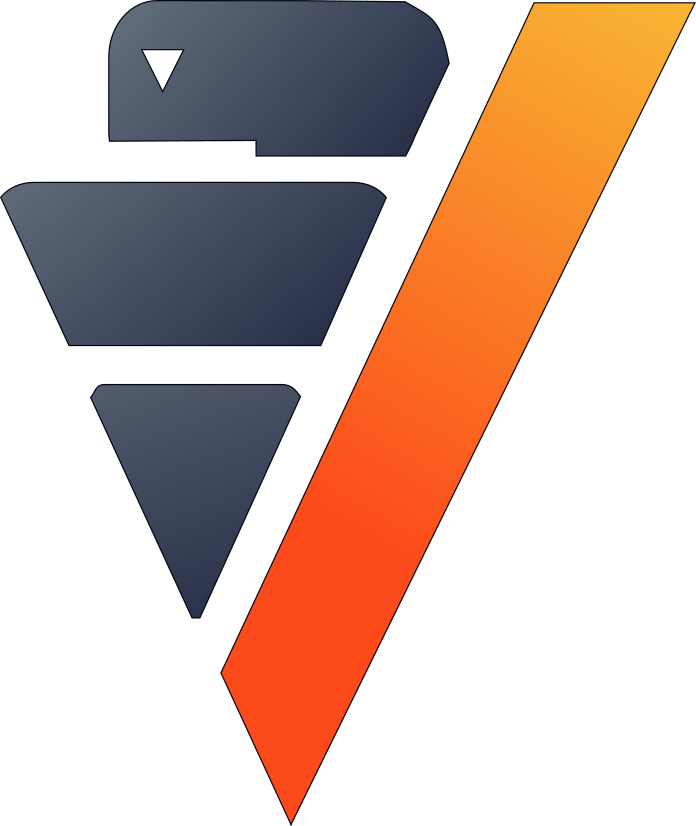

In [29]:
africa = load_africa_education()
# Computing the averaged score
africa["score"] = (africa["zralocp"] + africa["zmalocp"]) / 2 
# Computing the averaged student score
africa.analytic(
    func = "row_number",
    by = ["schoolname"],
    order_by = {"score": "desc"},
    name = "student_class_position"
)
# Finding the 3 best students by class
africa.case_when(
    "best",
    africa["student_class_position"] <= 5, 1,
    0
)
# Selecting the main variables
africa = africa[[
    "PENGLISH", 
    "PAGE", 
    "zpses", 
    "PREPEAT",
    "PTRAVEL2", 
    "PLIGHT",
    "SLOCAT",
    "best",
    "zpmealsc",
    "PFATHER",
    "SPUPPR04",
    "PNURSERY"]
]
# Getting the categories dummies for the Logistic Regression
africa.one_hot_encode(
    columns = [
        "PLIGHT", 
        "PTRAVEL2",
        "PREPEAT",
        "PENGLISH",
        "SLOCAT",
        "PFATHER",
        "SPUPPR04",
        "PNURSERY",
        "zpmealsc"
    ],
    max_cardinality = 1000
)
africa.dropna()

Let's create a logistic regression to understand what circumstances allowed these students to perform as well as they have.



details
         predictor          |coefficient|std_err |z_value |p_value 
----------------------------+-----------+--------+--------+--------
         Intercept          |  0.56619  | 0.23976| 2.36148| 0.01820
            page            | -0.03924  | 0.01120|-3.50227| 0.00046
           zpses            |  0.04907  | 0.00828| 5.92510| 0.00000
       plight_candle        | -0.22145  | 0.04813|-4.60116| 0.00000
      plight_electric       | -0.37554  | 0.05523|-6.79946| 0.00000
        plight_fire         | -0.15326  | 0.08833|-1.73498| 0.08274
         plight_gas         | -0.27762  | 0.10984|-2.52756| 0.01149
     plight_no_lighting     | -0.06173  | 0.20458|-0.30173| 0.76285
      ptravel2_bicycle      | -0.21676  | 0.11027|-1.96570| 0.04933
   ptravel2_bus_truck_van   | -0.24408  | 0.06833|-3.57206| 0.00035
        ptravel2_car        | -0.03803  | 0.07225|-0.52640| 0.59861
       ptravel2_other       |  0.05957  | 0.19344| 0.30795| 0.75812
       ptravel2_train       | -0.62224

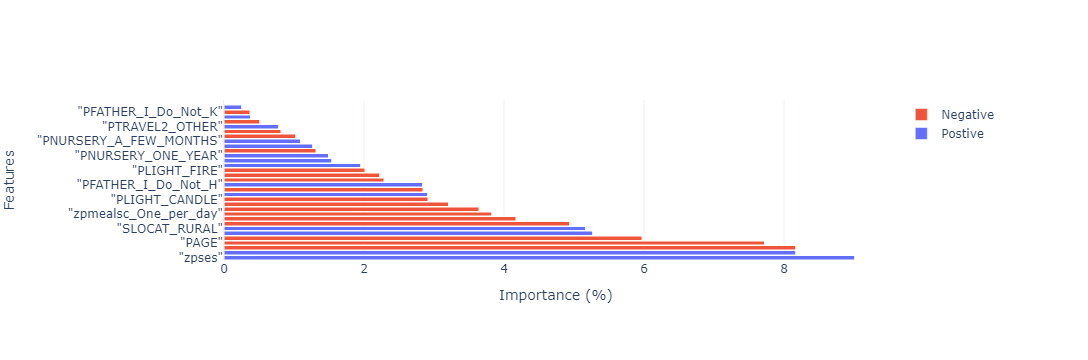

In [32]:
from verticapy.machine_learning.vertica.linear_model import LogisticRegression

response = "best"
predictors = africa.get_columns(
    exclude_columns = [
        "PLIGHT", 
        "PTRAVEL2",
        "PREPEAT",
        "PENGLISH",
        "SLOCAT",
        "PFATHER",
        "SPUPPR04",
        "PNURSERY",
        "zpmealsc",
        "best"
    ])
vp.drop("africa_logit_best")
model_africa_logit_best = LogisticRegression(
    name="africa_logit_best", 
    solver="BFGS"
)
model_africa_logit_best.fit(
    africa,
    predictors, 
    response
)
model_africa_logit_best.features_importance()

We can see that the best students tend to be young, speak English at home, come from a good socioeconomic background, have a father with a degree, and live relatively close to school.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!